In [305]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

In [306]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

<b>Lets explore the health expenditure of India compared to other developing countries like China.</b>

In [308]:
health_filter='Health expenditure, total \(\% of GDP\)'
india_code = 'IND'
china_code = 'CHN'


india_mask = data['CountryCode'].str.contains(india_code)
china_mask = data['CountryCode'].str.contains(china_code)
health_mask = data['IndicatorName'].str.contains(health_filter)

india_health_exp = data[india_mask & health_mask]
china_health_exp = data[china_mask & health_mask]

In [310]:
india_health_exp.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2550719,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1995,4.064824
2685740,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1996,3.942175
2821173,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1997,4.294396
2958149,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1998,4.343979
3097445,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1999,4.075596
3245806,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2000,4.314108
3398139,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2001,4.546835
3550764,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2002,4.454388
3705004,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2003,4.350801
3860366,India,IND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2004,4.561793


In [311]:
china_health_exp.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2523687,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1995,3.544976
2658660,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1996,3.806619
2794266,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1997,4.047860
2930960,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1998,4.358571
3069205,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1999,4.513426
3215461,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2000,4.622937
3368744,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2001,4.583395
3520209,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2002,4.811688
3675129,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2003,4.847566
3829429,China,CHN,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,2004,4.747541


Lets plot these dataframe together on line plot to visualize it better

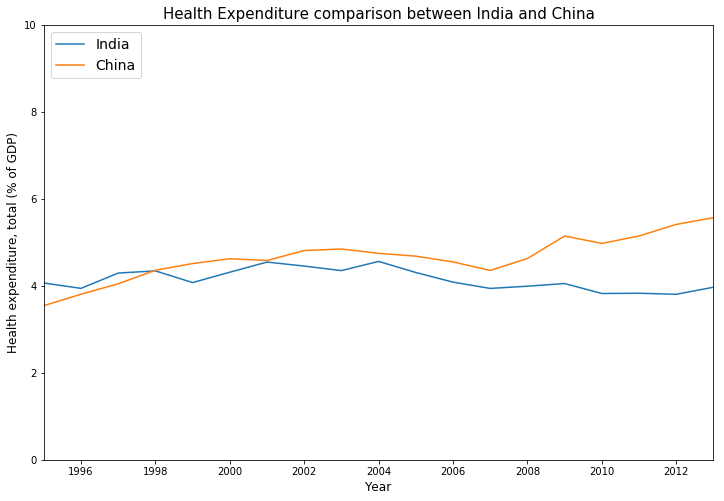

In [312]:
fig,ax = plt.subplots(figsize=(12,8))
line1, = ax.plot(india_health_exp['Year'].values, india_health_exp['Value'].values, label="India")
line2, = ax.plot(china_health_exp['Year'].values, china_health_exp['Value'].values, label="China")

ax.set_xlabel('Year', fontsize='12')
ax.set_ylabel(india_health_exp['IndicatorName'].iloc[0], fontsize='12')
ax.set_title('Health Expenditure comparison between India and China',fontsize='15')
ax.legend(handles=[line1, line2], loc='upper left', fontsize='14')
ax.set_ylim([0,10])
ax.set_xlim([india_health_exp['Year'].min(),india_health_exp['Year'].max()])
plt.show()

In 1995, India's health expenditure(% of GDP) was 4.06% compared to China's 3.5% but India's health expenditure have rather decreased over the years with 3.9% of GDP in 2013 compared to China's 5.56%.

<b>Lets explore the Health expenditure per capita and it's correlation with the Life expectancy of polulation of India.</b>

In [313]:
health_exp_filter = 'Health expenditure per capita \(current US\$\)'
country_filter = 'IND'

mask1 = data['CountryCode'].str.contains(country_filter)
mask2 = data['IndicatorName'].str.contains(health_exp_filter)

health_exp_data = data[mask1 & mask2]

In [314]:
health_exp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2550713,India,IND,Health expenditure per capita (current US$),SH.XPD.PCAP,1995,16.088374
2685734,India,IND,Health expenditure per capita (current US$),SH.XPD.PCAP,1996,16.226104
2821167,India,IND,Health expenditure per capita (current US$),SH.XPD.PCAP,1997,18.774171
2958143,India,IND,Health expenditure per capita (current US$),SH.XPD.PCAP,1998,18.840850
3097439,India,IND,Health expenditure per capita (current US$),SH.XPD.PCAP,1999,18.683437


In [315]:
life_exp_filter = 'Life expectancy at birth, total \(years\)'

mask3 = data['IndicatorName'].str.contains(life_exp_filter)

life_exp_data = data[mask1 & mask3]

In [316]:
life_exp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11684,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,41.171951
36635,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,41.790488
64177,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,42.417415
92622,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,43.052732
121419,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,43.698415


Before calculating the correlation between the life expectancy and health expenditure we need to slice the data further since health expenditure data is only available between 1995 to 2013. 

In [317]:
filtered_life_exp_data = life_exp_data[life_exp_data['Year'].isin(health_exp_data['Year'].unique())]

In [318]:
filtered_life_exp_data.shape

(19, 6)

In [319]:
health_exp_data.shape

(19, 6)

In [320]:
np.corrcoef(health_exp_data['Value'],filtered_life_exp_data['Value'])

array([[1.        , 0.95656092],
       [0.95656092, 1.        ]])

Finding: Correlation value of 0.95 between the Health expenditure and Life expectancy clearly suggests growth in health expenditure have lead to proportional growth in life expectancy in India. 

<b>Lets explore the GDP per capita data for India</b>

In [321]:
gdp_filter = 'GDP per capita \(constant 2005'

mask4 = data['IndicatorName'].str.contains(gdp_filter)

gdp_data = data[mask1 & mask4]

In [323]:
gdp_data.describe()

,Year,Value
count,55.00000,55.000000
mean,1987.00000,472.921846
std,16.02082,272.215645
min,1960.00000,228.304470
25%,1973.50000,273.019022
50%,1987.00000,349.639894
75%,2000.50000,580.708296
max,2014.00000,1233.949344


<b>Exploring the changes in GDP per capita of India by plotting it on line plot</b>

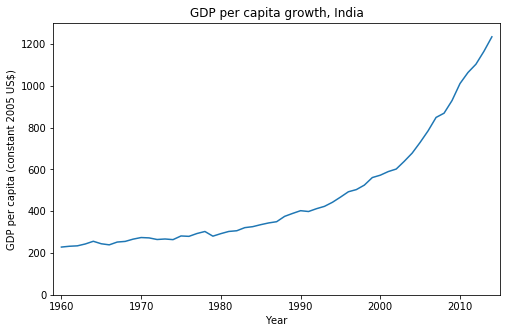

In [324]:
plt.figure(figsize=(8,5))
plt.plot(gdp_data['Year'].values, gdp_data['Value'].values)

plt.xlabel('Year')
plt.ylabel(gdp_data['IndicatorName'].iloc[0])

plt.title('GDP per capita growth, India')

plt.axis([1959,2015,0,1300])

plt.show()

We can see there has been a substantial growth in GDP since 1990.

<b>Lets see if we can find a correlation between the Health expenditure, Life expectancy and GDP per capita by plotting it on the scatterplot.</b>

First, we will merge the three dataframes based on years into new dataframe 'country_data'

In [325]:
country_data = pd.merge(gdp_data, health_exp_data[['IndicatorName','Year','Value']], on='Year', how='left')

In [326]:
country_data.head()

,CountryName,CountryCode,IndicatorName_x,IndicatorCode,Year,Value_x,IndicatorName_y,Value_y
0,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470,NaN,NaN
1,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053,NaN,NaN
2,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685,NaN,NaN
3,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418,NaN,NaN
4,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668,NaN,NaN


In [328]:
country_data.tail()

,CountryName,CountryCode,IndicatorName_x,IndicatorCode,Year,Value_x,IndicatorName_y,Value_y
50,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,1010.309221,Health expenditure per capita (current US$),53.995063
51,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,1063.159868,Health expenditure per capita (current US$),60.544216
52,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,1102.910323,Health expenditure per capita (current US$),58.246599
53,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,1164.342834,Health expenditure per capita (current US$),61.408213
54,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,1233.949344,NaN,NaN


In [329]:
country_data.isnull().any()

CountryName        False
CountryCode        False
IndicatorName_x    False
IndicatorCode      False
Year               False
Value_x            False
IndicatorName_y     True
Value_y             True
dtype: bool

We can see there are NaN values for IndicatorName_y and Value_y since the health expenditure per capita is not available for years 1960 to 1994 and 2014. We can fill the NaN value with last known values using fillna method assuming health expenditure (1960 to 1994) less than equal to health expenditure (1995). 

In [330]:
country_data = country_data.fillna(method='backfill')

In [331]:
country_data = country_data.fillna(method='ffill')

In [332]:
country_data.isnull().any()

CountryName        False
CountryCode        False
IndicatorName_x    False
IndicatorCode      False
Year               False
Value_x            False
IndicatorName_y    False
Value_y            False
dtype: bool

In [333]:
country_data.tail()

,CountryName,CountryCode,IndicatorName_x,IndicatorCode,Year,Value_x,IndicatorName_y,Value_y
50,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,1010.309221,Health expenditure per capita (current US$),53.995063
51,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,1063.159868,Health expenditure per capita (current US$),60.544216
52,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,1102.910323,Health expenditure per capita (current US$),58.246599
53,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,1164.342834,Health expenditure per capita (current US$),61.408213
54,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,1233.949344,Health expenditure per capita (current US$),61.408213


In [334]:
country_data = pd.merge(country_data, life_exp_data[['IndicatorName','Year','Value']], on='Year', how='inner')

In [335]:
country_data.isnull().any()

CountryName        False
CountryCode        False
IndicatorName_x    False
IndicatorCode      False
Year               False
Value_x            False
IndicatorName_y    False
Value_y            False
IndicatorName      False
Value              False
dtype: bool

In [336]:
country_data.tail()

,CountryName,CountryCode,IndicatorName_x,IndicatorCode,Year,Value_x,IndicatorName_y,Value_y,IndicatorName,Value
49,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2009,928.977520,Health expenditure per capita (current US$),45.575644,"Life expectancy at birth, total (years)",66.102634
50,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,1010.309221,Health expenditure per capita (current US$),53.995063,"Life expectancy at birth, total (years)",66.506146
51,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,1063.159868,Health expenditure per capita (current US$),60.544216,"Life expectancy at birth, total (years)",66.904171
52,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,1102.910323,Health expenditure per capita (current US$),58.246599,"Life expectancy at birth, total (years)",67.289878
53,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,1164.342834,Health expenditure per capita (current US$),61.408213,"Life expectancy at birth, total (years)",67.660415


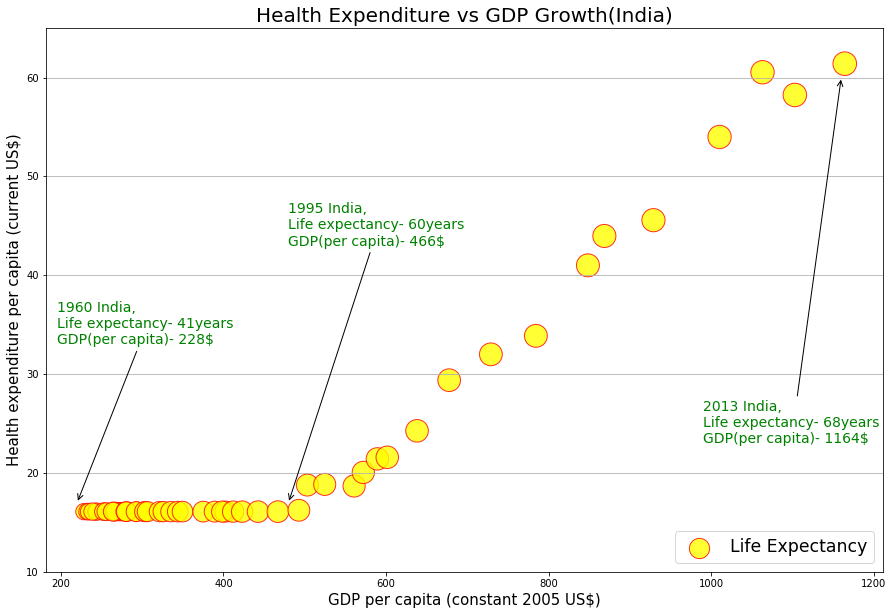

In [337]:
fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Health Expenditure vs GDP Growth(India)',fontsize=20)
axis.set_xlabel(country_data['IndicatorName_x'].iloc[0],fontsize=15)
axis.set_ylabel(country_data['IndicatorName_y'].iloc[0],fontsize=15)
axis.set_ylim(10,65)

axis.annotate("1960 India, \nLife expectancy- 41years \nGDP(per capita)- 228$",
                xy=(220, 17), 
                xycoords='data',
                xytext=(195, 33), 
                textcoords='data',
                arrowprops=dict(arrowstyle="->",
                connectionstyle="arc3"),fontsize=14, color='green'
            )

axis.annotate("1995 India, \nLife expectancy- 60years \nGDP(per capita)- 466$",
                xy=(480, 17), 
                xycoords='data',
                xytext=(480, 43), 
                textcoords='data',
                arrowprops=dict(arrowstyle="->",
                connectionstyle="arc3"),fontsize=14, color='green'
            )

axis.annotate("2013 India, \nLife expectancy- 68years \nGDP(per capita)- 1164$",
                xy=(1160, 60), 
                xycoords='data',
                xytext=(990, 23), 
                textcoords='data',
                arrowprops=dict(arrowstyle="->",
                connectionstyle="arc3"),fontsize=14, color='green'
            )

X = country_data['Value_x']
Y = country_data['Value_y']
S = country_data['Value']**1.5

axis.scatter(X, Y, s=S,label='Life Expectancy',
               alpha=0.8, color='yellow', edgecolors='Red')
axis.legend(loc='lower right',prop={'weight':'roman','size':'xx-large'})

plt.show()

In [338]:
country_data[['Value_x','Value_y']].corr()

,Value_x,Value_y
Value_x,1.000000,0.938328
Value_y,0.938328,1.000000


<b>Scatterplot and correlation value of 0.93 clearly shows there is strong relationship between the Health expenditure and GDP growth. Now lets verify these findings by analysing the data for similar developing economies.</b>

In [339]:
china_health_exp = data[mask2 & china_mask]
china_gdp_data = data[mask4 & china_mask]

In [340]:
china_health_exp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2523681,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1995,20.742711
2658654,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1996,25.975256
2794260,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1997,30.511171
2930954,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1998,34.926572
3069199,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1999,38.195679


In [341]:
china_gdp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7187,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,121.191585
31484,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,89.005585
58684,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,83.334735
87069,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,89.605409
115795,China,CHN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,103.571525


In [342]:
china_data = pd.merge(china_health_exp, china_gdp_data[['IndicatorName','Year','Value']], on='Year', how='inner')

In [343]:
china_data.head()

,CountryName,CountryCode,IndicatorName_x,IndicatorCode,Year,Value_x,IndicatorName_y,Value_y
0,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1995,20.742711,GDP per capita (constant 2005 US$),782.093690
1,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1996,25.975256,GDP per capita (constant 2005 US$),850.750357
2,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1997,30.511171,GDP per capita (constant 2005 US$),919.786248
3,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1998,34.926572,GDP per capita (constant 2005 US$),982.548142
4,China,CHN,Health expenditure per capita (current US$),SH.XPD.PCAP,1999,38.195679,GDP per capita (constant 2005 US$),1048.284370


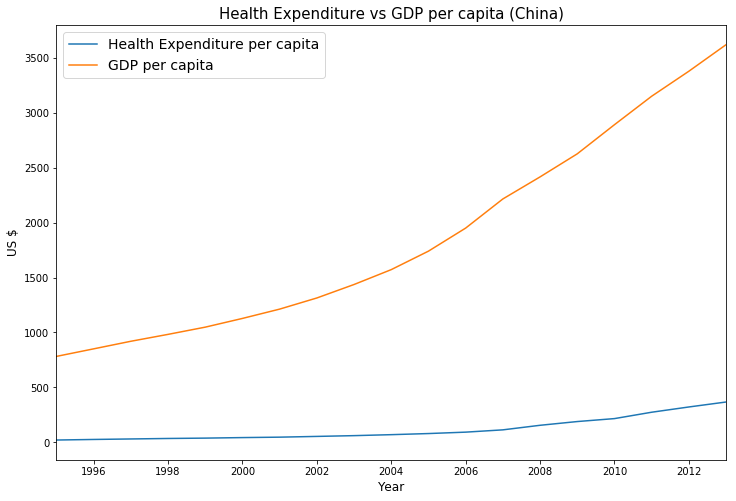

In [344]:
fig,ax = plt.subplots(figsize=(12,8))
line1, = ax.plot(china_data['Year'].values, china_data['Value_x'].values, label="Health Expenditure per capita")
line2, = ax.plot(china_data['Year'].values, china_data['Value_y'].values, label="GDP per capita")

ax.set_xlabel('Year', fontsize='12')
ax.set_ylabel('US $', fontsize='12')
ax.set_title('Health Expenditure vs GDP per capita (China)',fontsize='15')
ax.legend(handles=[line1, line2], loc='upper left', fontsize='14')
#ax.set_ylim([0,10])
ax.set_xlim([china_data['Year'].min(),china_data['Year'].max()])
plt.show()

In [345]:
np.corrcoef(china_data['Value_x'], china_data['Value_y'])

array([[1.       , 0.9727291],
       [0.9727291, 1.       ]])

With correlation value of 0.97 for China it confirms our previous findings that increase in Health expenditure inturn leads to economic growth.

<b>Now that we know the importance of Health care, let explore it further to find the public contribution to health expenditure and what effects it will have on the Indian population?</b>

In [347]:
mask5 = data['IndicatorName'].str.contains('Health expenditure, public \(\% of total health expenditure\)')
mask6 = data['IndicatorName'].str.contains('Poverty headcount ratio at national poverty lines \(\% of population\)')

public_health_exp_data = data[mask1 & mask5]
poverty_data = data[mask1 & mask6]

In [348]:
public_health_exp_data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4746719,India,IND,"Health expenditure, public (% of total health ...",SH.XPD.PUBL,2009,30.034031
4929534,India,IND,"Health expenditure, public (% of total health ...",SH.XPD.PUBL,2010,30.195803
5111335,India,IND,"Health expenditure, public (% of total health ...",SH.XPD.PUBL,2011,29.826705
5287012,India,IND,"Health expenditure, public (% of total health ...",SH.XPD.PUBL,2012,30.455623
5453180,India,IND,"Health expenditure, public (% of total health ...",SH.XPD.PUBL,2013,32.215077


In [349]:
public_health_exp_data.describe()

,Year,Value
count,19.000000,19.000000
mean,2004.000000,26.878575
std,5.627314,2.809142
min,1995.000000,21.912007
25%,1999.500000,24.691476
50%,2004.000000,26.682532
75%,2008.500000,29.390584
max,2013.000000,32.215077


In [350]:
poverty_data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2296334,India,IND,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,1993,45.3
3860676,India,IND,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,2004,37.2
4747049,India,IND,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,2009,29.8
5111668,India,IND,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,2011,21.9
